# 0a: Tractability in univariate Bayesian inference - Exercise

## Section 1.2 - Exercise

With the Lagrangian multipliers you can solve functions with constraints as if you were optimizing a single function. In this case, we want to find $max -\sum_xp(x)\log p(x)$, but $p(x$ must be a valid probability function, so we must add the constraint $\sum_x p(x) = 1$, or equivalently $\sum p(x) - 1 = 0$.
With the Lagranfian multipliers method you can add the constraints to the main equation, multiplied by a new variable $\lambda$, one for each constraint, and optimize all together. In this case we have, for a discrete random variable $X$ with $N$ possible values:

$$
L(p(x),\lambda) = -\sum_x p(x)\log p(x) + \lambda (\sum_x p(x) -1)
$$

Now we can take the derivarie both with respect to $p(x)$ and $\lambda$ to find the maximum of the function:

$$
\frac{dL}{dp(x)} = 0 = -\log p(x) - 1 + \lambda → p(x)=e^{-1 + \lambda}\\
\frac{dL}{d\lambda} = 0 = \sum_x p(x) -1 → \sum_x p(x) = 1
$$
Putting the two results together, we get:
$$
\sum_x e^{-1+\lambda} = 1 → N e^{-1 + \lambda} = 1 → p(x) = \frac{1}{N} ∀ x \in X
$$

## Section 1.2.1 - Exercise

See Proof 1 at [this link](https://en.wikipedia.org/wiki/Jensen%27s_inequality#Proof_1_(finite_form)).


## Section 1.4.2 - Exercise 1

I have changed a bit the numbers from the lecture pdf, but the whole procedure remains the same. In particular, I use $a=3$ degrees/mm, so that $h=\frac{T}{a}$, and the standard deviation for the likelihood is 1mm instead of 0.01.

Here we have to compute the quantized posterior. The likelihood has the form (in the temperature space) $\mathcal{N}(a*h; T, (1*a)^2$), while the prior is $\mathcal{N}(T; 37,4^2)$.

Note that in this problem we have only one observation $h$, but in a more generic case, with several observations $h_i$, the likelihood would be $$
\prod_i \mathcal{N}(a*h_i; T, (1*a)^2) $$

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [2]:
def gaussian_pdf(x,mu,s):
  return np.exp(-(x-mu)**2/(2*(s**2)))/np.sqrt(2*np.pi*s**2)

First, we have to compute the evidence as in eq 57 (don't forget to multiply by d_t!)


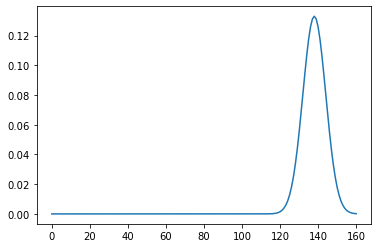

In [6]:
d_t = 0.5
t_range = np.arange(-30, 50.5, d_t)
prior = gaussian_pdf(t_range, 37, 4)
measurement = gaussian_pdf(13*3, t_range, 1*3)


evidence = np.sum(measurement * prior * d_t)

plt.plot(measurement)

Now we can compute the likelihood * prior for a range of temperatures. Note that we don't have to use the same range used for the evidence. Finally we can divide by the evidence and obtain the posterior distribution

In [95]:
d_t = 0.05
z_range = np.arange(0,75, d_t)
likelihood = gaussian_pdf(13*3, z_range, 1*3)
prior = gaussian_pdf(z_range, 37, 4)
posterior = likelihood * prior / evidence

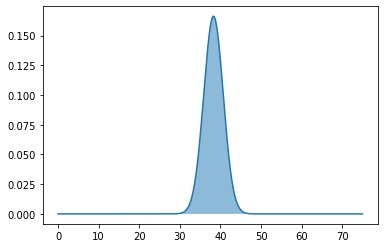

In [96]:
plt.plot(z_range, posterior)
plt.fill_between(z_range, 0, posterior, alpha=0.5)

As a sanity check, we can make sure that the area under the posterior sums up to one.

In [97]:
auc(z_range, posterior)

1.0000002919421878

In [98]:
np.max(posterior)

0.16622022705976794

## Section 1.4.2 - Exercise 2

Here I also changed the fact that 42 is in degrees instead of mm.

The difference from before is that the likelihood now is a mixture distribution between a Gaussian and a Delta:
$$P(h\mid T) = \mathcal{N}(a*h; T, (1*a)^2)* 0.5 + \delta(a*h;42) * 0.5$$

In [7]:
def delta_42(x):
    return np.where(x==42, 1, 0)



Let's first solve in the case where our friend tells 42 (degrees).

In [80]:
d_t = 0.5
t_range = np.arange(-30, 50.5, d_t)
evidence = np.sum((gaussian_pdf(42, t_range, 1*3) * 0.5 + delta_42(42) * 0.5) * gaussian_pdf(t_range, 37, 4) * d_t)

In [81]:
d_t = 0.05
z_range = np.arange(0,75, d_t)
likelihood = gaussian_pdf(42, z_range, 1*3) * 0.5 + delta_42(42) * 0.5
prior = gaussian_pdf(z_range, 37, 4)
posterior = likelihood * prior / evidence

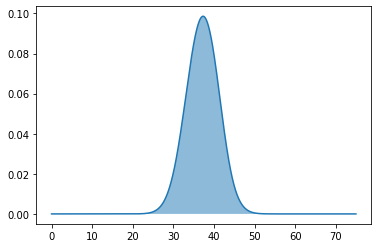

In [82]:
plt.plot(z_range, posterior)
plt.fill_between(z_range, 0, posterior, alpha=0.5)

In [83]:
auc(z_range,posterior)

1.0004384235236667

Now the case where the friend tells 13 mm

In [99]:
d_t = 0.5
t_range = np.arange(-30, 50.5, d_t)
evidence = np.sum((gaussian_pdf(13*3, t_range, 1*3) * 0.5 + delta_42(13*3) * 0.5) * gaussian_pdf(t_range, 37, 4) * d_t)

In [100]:
d_t = 0.05
z_range = np.arange(0, 75, d_t)
likelihood = gaussian_pdf(13*3, z_range, 1*3) * 0.5 + delta_42(13*3) * 0.5
prior = gaussian_pdf(z_range, 37, 4)
posterior = likelihood * prior / evidence

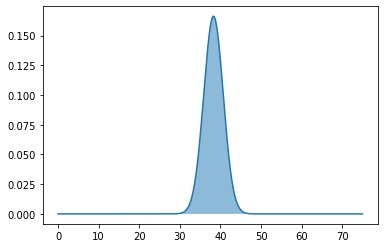

In [101]:
plt.plot(z_range, posterior)
plt.fill_between(z_range, 0, posterior, alpha=0.5)

In [102]:
auc(z_range,posterior)

1.0000002919421878

In [103]:
np.max(posterior)

0.16622022705976794

## Section 3.1 - Exercise 1 (Attempt)

$$
F(\eta) = -\log ∫e^{-\eta^TΦ(y)}dy \\
\frac{F(\eta)}{d\eta} = \frac{1}{∫e^{-\eta^TΦ(y)}dy} \left(-∫Φ(y)e^{-\eta^TΦ(y)}dy\right) \\
= \frac{1}{e^{-F(\eta)}} \left(-∫Φ(y)e^{-\eta^TΦ(y)}dy\right) \\
= -e^{F(\eta)} \left(-∫Φ(y)e^{-\eta^TΦ(y)}dy\right) \\
= ∫Φ(y)e^{-\eta^TΦ(y)+F(\eta)}dy
$$

## Section 3.2 - Exercise 2

Todo